In [1]:
# Import Package
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=10):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, sample in enumerate(X):
                linear_output = (
                    np.dot(sample, self.weights) + self.bias
                )  # y = self.weights * sample + self.bias
                y_predicted = self.activation_function(linear_output)
                update = self.learning_rate * (
                    y[idx] - y_predicted
                )  # 실제 잔차의 10%만 반영
                self.weights += update * sample
                self.bias += update

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

```
클래스 및 메서드 설명
1. __init__(self, learning_rate=0.1, n_iter=10)
    설명: 퍼셉트론 객체를 초기화하는 생성자입니다.

    매개변수:
    learning_rate: 학습률로, 모델이 얼마나 빠르게 학습하는지를 결정합니다. 기본값은 0.1입니다.
    n_iter: 학습 데이터에 대해 반복할 횟수(에포크 수)입니다. 기본값은 10입니다.

    초기화되는 변수:
    self.weights: 가중치를 저장할 변수로, 나중에 학습 과정에서 초기화됩니다.
    self.bias: 바이어스를 저장할 변수로, 나중에 학습 과정에서 초기화됩니다.

2. fit(self, X, y)
    설명: 입력 데이터 X와 레이블 y를 사용해 모델을 학습합니다.

    매개변수:
    X: 입력 데이터로, 각 샘플은 여러 특징(피처)을 가집니다. X는 2차원 배열(행렬)로 표현됩니다.
    y: 실제 레이블(정답) 값으로, X의 각 샘플에 대응되는 1차원 배열입니다.

    과정:
    X의 샘플 수(n_samples)와 특징 수(n_features)를 가져옵니다.
    가중치를 0으로 초기화합니다(self.weights = np.zeros(n_features)).
    바이어스도 0으로 초기화합니다(self.bias = 0).
    주어진 반복 횟수(n_iter)만큼 학습을 진행합니다.
    각 반복에서, 모든 샘플에 대해 다음 작업을 수행합니다:
    입력 데이터와 가중치의 선형 조합(linear_output)을 계산합니다.
    이 값을 기반으로 예측값(y_predicted)을 얻습니다.
    예측값과 실제 값의 차이(잔차)를 계산한 후, 이를 바탕으로 가중치와 바이어스를 업데이트합니다.

3. activation_function(self, x)
    설명: 퍼셉트론의 활성화 함수로, 선형 조합의 결과를 이진 클래스(0 또는 1)로 변환합니다.

    매개변수:
    x: 선형 조합의 결과 값입니다.

    반환값:
    x가 0 이상이면 1, 그렇지 않으면 0을 반환합니다.

4. predict(self, X)
    설명: 학습된 모델을 사용해 새로운 데이터 X에 대한 예측을 수행합니다.

    매개변수:
    X: 예측을 수행할 새로운 입력 데이터입니다.
    반환값:
    X에 대한 예측값을 반환합니다.
    동작 원리
    학습 과정(fit): 가중치(weights)와 바이어스(bias)를 반복적으로 조정하면서 모델이 데이터를 잘 분류할 수 있도록 만듭니다.
```

예측 결과: [0 0 0 1]


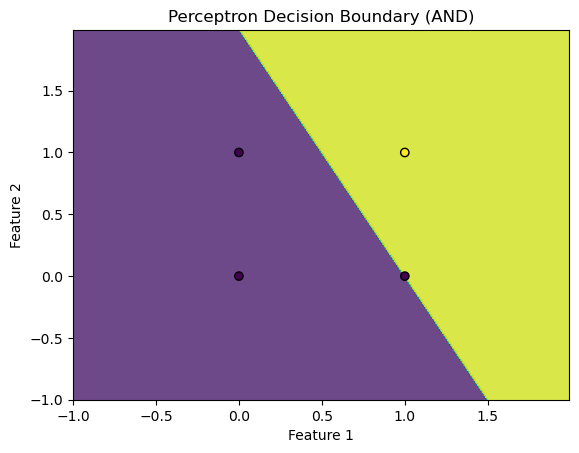

In [3]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", marker="o")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Perceptron Decision Boundary (AND)")
    plt.show()


# AND 게이트
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# 퍼셉트론 학습시키기
model = Perceptron(learning_rate=0.1, n_iter=10)
model.fit(X, y)

predictions = model.predict(X)  # 예측
print("예측 결과:", predictions)

plot_decision_boundary(X, y, model)  # 시각화

In [ ]:
# AND 게이트
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# 퍼셉트론 학습시키기
model = Perceptron(learning_rate=0.1, n_iter=10)
model.fit(X, y)

predictions = model.predict(X)  # 예측
print("예측 결과:", predictions)

plot_decision_boundary(X, y, model)  # 시각화

[0 1 1 1]


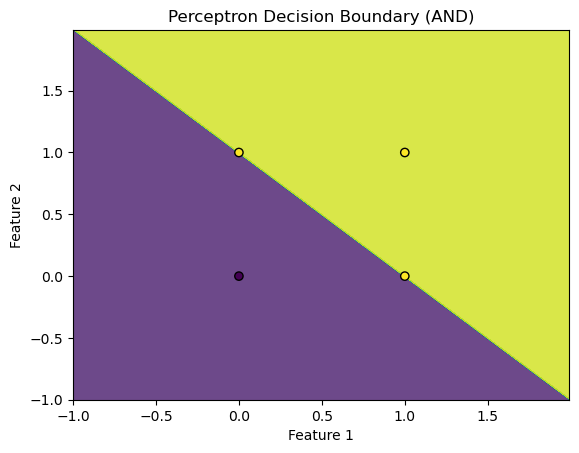

In [4]:
# 다른 형태의 게이트

# OR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

model = Perceptron(learning_rate=0.1, n_iter=10)
model.fit(X, y)

predictions = model.predict(X)
print(predictions)
plot_decision_boundary(X, y, model)

[1 1 1 0]


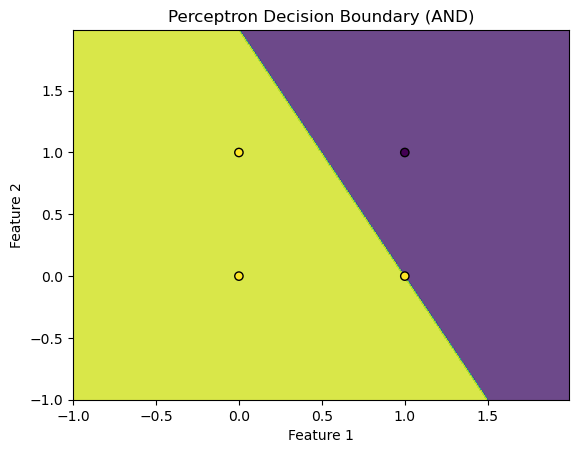

In [5]:
# NAND
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 1, 1, 0])

model = Perceptron(learning_rate=0.1, n_iter=10)
model.fit(X, y)

predictions = model.predict(X)
print(predictions)
plot_decision_boundary(X, y, model)

[1 1 0 0]


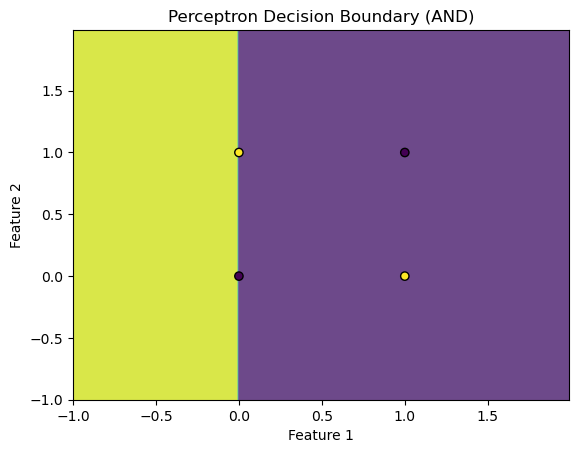

In [15]:
# XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

model = Perceptron(learning_rate=0.1, n_iter=10)
model.fit(X, y)

predictions = model.predict(X)
print(predictions)
plot_decision_boundary(X, y, model)

In [20]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", marker="o")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Neural Network Decision Boundary (XOR)")
    plt.show()

In [21]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

model = Perceptron(learning_rate=0.1, n_iter=10)
model.fit(X, y)

predictions = model.predict(X)
print(predictions)

[1 1 0 0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
예측 결과:
 [[0]
 [1]
 [1]
 [0]]
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step


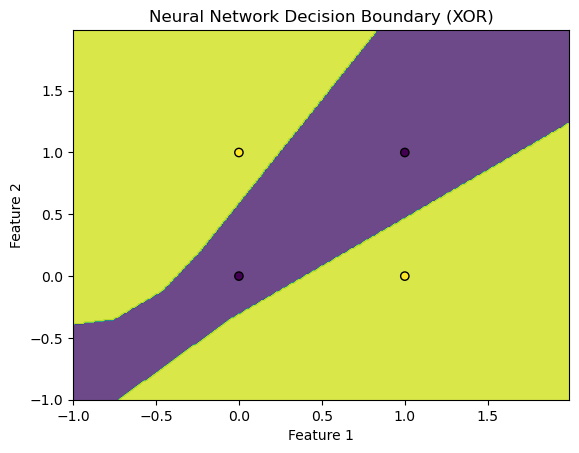

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(4, input_dim=2, activation="relu"))  # 입력층
model.add(Dense(4, activation="relu"))  # 은닉층
model.add(Dense(1, activation="sigmoid"))  # 출력층 , sigmoid는 이진분류를 할 때 사용
model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)  # 컴파일

model.fit(X, y, epochs=2000, verbose=0)  # 다층 퍼셉트론 학습시키기

predictions = model.predict(X)  # 예측
predictions = (predictions > 0.5).astype(int)  # 이진 데이터로 변환
print("예측 결과:\n", predictions)

plot_decision_boundary(model, X, y)  # 시각화